In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import base64
from io import BytesIO
import seaborn as sns  # Added for richer visualisations

# Style configuration for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 160  # Increase image quality

In [10]:
INPUT_PATH = "data/abc_test_with_behavior.csv"
INPUT_PATH2 = "data/ab_test_pet_pdp.csv"
SUMMARY_OUTPUT = "data/ab_test_summary_new.csv"
HTML_REPORT_OUTPUT = "data/ab_test_report_new.html"  # New output path

In [13]:
# ===================================================================
# 1. LOAD DATA
# ===================================================================
df = pd.read_csv(INPUT_PATH2)
print("Loaded dataset:", df.shape)
print(df.head())

Loaded dataset: (11000, 10)
   user_id variant  impression  conversion  scroll_depth_pct  \
0        1       A           1           0              99.0   
1        2       C           1           0              67.7   
2        3       C           1           0              61.0   
3        4       B           1           0             100.0   
4        5       A           1           0              84.4   

   image_interactions  time_on_pdp_seconds                   timestamp  \
0                   1                 38.8  2025-11-08 10:09:48.513863   
1                   2                 48.7  2025-11-09 23:42:29.684858   
2                   2                 28.4  2025-11-14 02:31:00.658668   
3                   1                 63.0  2025-11-18 03:08:07.832547   
4                   3                 27.9  2025-11-05 23:16:34.358849   

    device traffic_source  
0  desktop           paid  
1   mobile          email  
2   mobile           paid  
3   mobile         social  
4 

In [14]:
# ===================================================================
# 2. KPI CALCULATIONS (INCL. CIs)
# ===================================================================
summary = df.groupby("variant").agg(
    visitors=("user_id", "count"),
    conversion_sum=("conversion", "sum"),
    conversion_rate=("conversion", "mean"),
    avg_scroll=("scroll_depth_pct", "mean"),
    avg_image_int=("image_interactions", "mean")
).reset_index()
summary

,variant,visitors,conversion_sum,conversion_rate,avg_scroll,avg_image_int
0,A,4442,365,0.082170,69.319023,2.001126
1,B,3363,365,0.108534,69.377490,1.989890
2,C,3195,399,0.124883,69.535618,2.004069


Do cumulative analysis

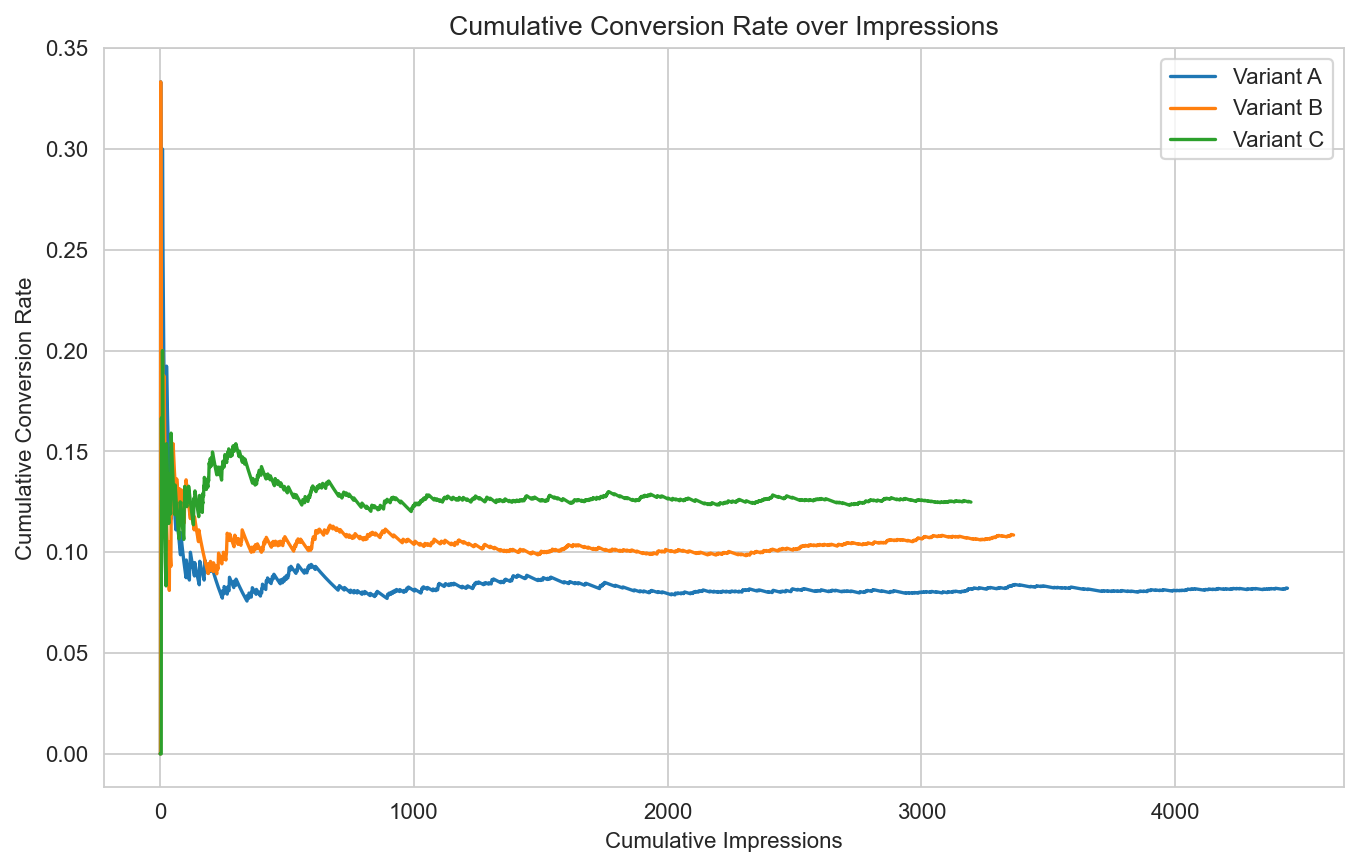

In [16]:
# Assuming df is your DataFrame with columns: user_id, variant, impression, conversion
# Sort by user_id or timestamp
df = df.sort_values(by='user_id')

# Calculate cumulative impressions and conversions by variant
df['cum_impressions'] = df.groupby('variant').cumcount() + 1
df['cum_conversions'] = df.groupby('variant')['conversion'].cumsum()

# Calculate cumulative conversion rate by variant
df['cum_conversion_rate'] = df['cum_conversions'] / df['cum_impressions']

# Pivot to plot cumulative conversion rates for A and B variants only
pivot_df = df[df['variant'].isin(['A', 'B', 'C'])].pivot(index='cum_impressions', columns='variant', values='cum_conversion_rate')

# Plot cumulative conversion rates
plt.figure(figsize=(10,6))
plt.plot(pivot_df.index, pivot_df['A'], label='Variant A')
plt.plot(pivot_df.index, pivot_df['B'], label='Variant B')
plt.plot(pivot_df.index, pivot_df['C'], label='Variant C')
plt.xlabel('Cumulative Impressions')
plt.ylabel('Cumulative Conversion Rate')
plt.title('Cumulative Conversion Rate over Impressions')
plt.legend()
plt.grid(True)
plt.show()


... if we would have stopped early, we would have a very different result. So we should have around 1000 impressions to make things stable. 
